# TNE 2: Principal Component Analysis
## Antoine OHLEYER & Habib SALAS

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [299]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

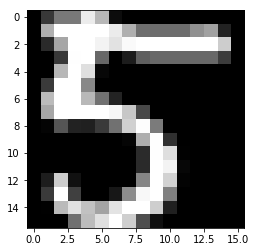

In [43]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

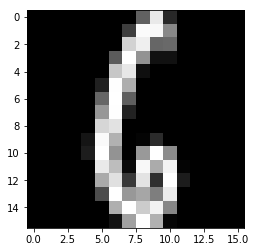

In [44]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [190]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [191]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
moy_test = x_test_brut.mean(axis=0)
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))
x_test_centre = x_test_brut-np.tile(moy_test,(N_test,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients
test_proj=pca.transform(x_test_centre)

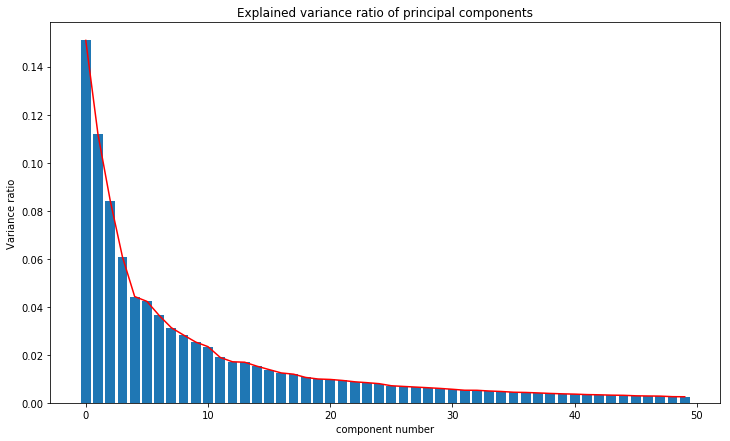

In [47]:
plt.figure(figsize=(12,7))
plt.bar([i for i in range(50)],pca.explained_variance_ratio_[:50])
plt.plot([i for i in range(50)],pca.explained_variance_ratio_[:50], color="red")
plt.title("Explained variance ratio of principal components")
plt.xlabel("component number")
plt.ylabel("Variance ratio")
plt.show()

We can already see that the variance distribution on the principal components is decreasing rapidely from the bigest component with the bigest eigen value. Approximately 20 of the components sum up 80% of the variance. This will help a lot in the dimension reduction till the variance scale upon the components is high (at least for the first components) and therfore in the images compression without affecting a lot the accuricies of classification algorithms on the data.

### Display the averaged images of 5 & 6 respectively

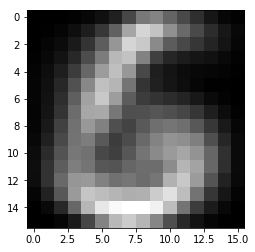

In [95]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

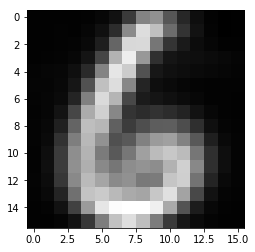

In [96]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


1) <font color="blue">Read the documentation of function PCA and identify the input and output parameters.<font>

- **Main parameters :**
    - **n_components** (_int): Represents the number of principal components. By the default it takes the minimum between the number of features (dimension) and the number of observations (data points)  
    - **svd_solver** (_string): Takes the name of the method to use for **Singular Value Decomposition**. By default take a value of `auto`, which means that it will chose either **the LAPACK implementation of the full SVD** or the **randomized SVD** according to data size predifiened considerations. 
    
- **Main outputs :**
    - **components_** : Principal axes in the feautures space, representing the directions of maximum variance in the data. 
    - **explained_variance_** : The amount of variance explained by each of the selected components. Equal to **n_components largest eigenvalues** of the covariance matrix of X.
    - **n_components_** : The estimated number of components. 
    - **singular_values_** : The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.

In [187]:
# Exercise 1
# Show of that explained_variance_ correspond to the eigen values of the covariance matrix of the entry matrix X
# To do so we compute (1/N)cov(X)*U0~explained_variance[0]*U0. We only show some values
#and computethe error of estimations as the distance between the two vectors.
V1=1/len(x_train_centre)*x_train_centre.T.dot(x_train_centre).dot(comp[:][0])[:10]
V2=pca.explained_variance_[0]*comp[:][0][:10]
print("Notice that the values are close but still not equal : \n\nV1 = {V1}\nV2 = {V2} ".format(V1=V1,V2=V2))
print("\nThe estimation error for this specific eigen vector is : ", la.norm((V1-V2),2))

Notice that the values are close but still not equal : 

V1 = [ 0.          0.00461679  0.01685243  0.09878122  0.22332857  0.38372317
  0.62872086  0.56766565 -0.21303496 -0.3219379 ]
V2 = [ 1.38906970e-16  4.63021151e-03  1.69014163e-02  9.90683713e-02
  2.23977780e-01  3.84838642e-01  6.30548535e-01  5.69315842e-01
 -2.13654252e-01 -3.22873762e-01] 

The estimation error for this specific eigen vector is :  0.003012256769944304


2) <font color="blue">Implement a progressive reconstruction of an image of digit 5 by adding the successive contribution of principal components.<font>

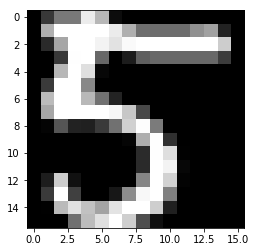

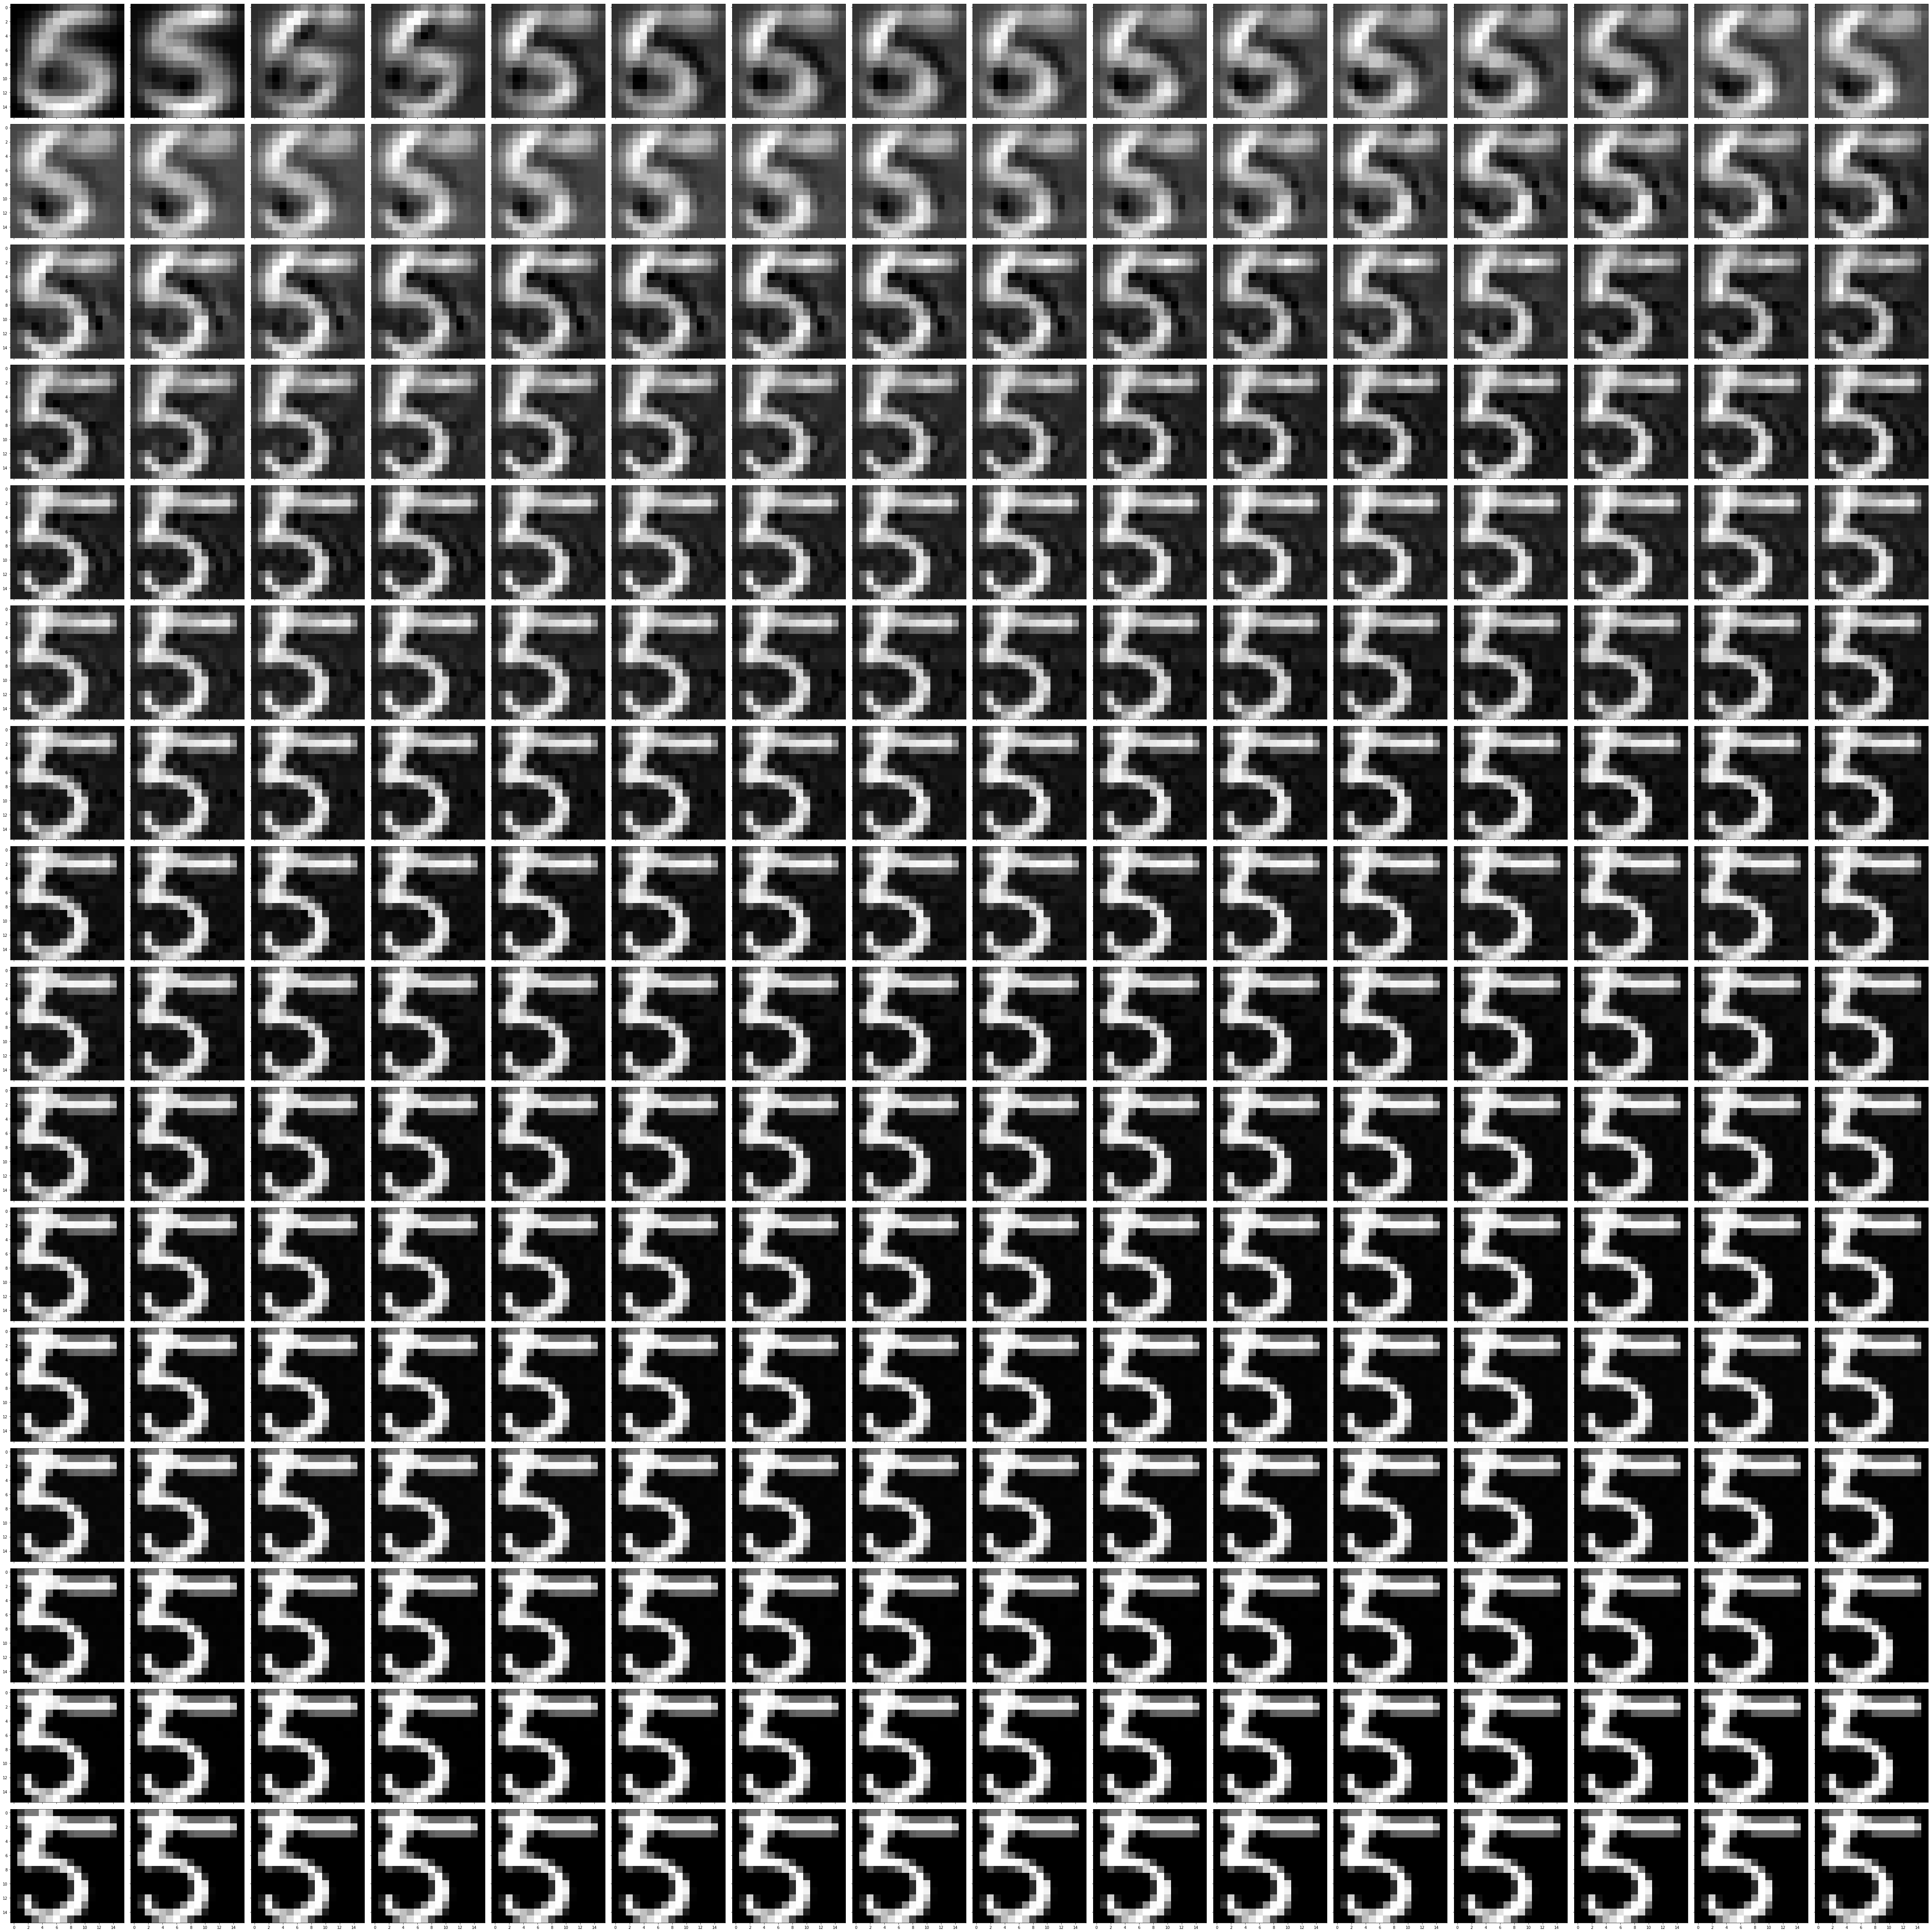

In [188]:
# Digit 5
n=9
digit5=train_5[n,:]

I = np.reshape(digit5,(16,16))
plt.imshow(I,cmap='gray')
plt.show()

I_0 = deepcopy(I_moy) 

fig, axes = plt.subplots(nrows=16, ncols=16, figsize=(70,70), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    I_0 = I_0 + proj[n,i]*np.reshape(comp[i,:],(16,16))
    ax.imshow(I_0,cmap='gray')
fig.tight_layout()
plt.show()

3) <font color="blue">Observe graphical results. How many components are necessary to obtain a reconstruction that you may consider as acceptable? nice? very nice?<font>

To see how accurate the reconstruction of the images we are going to compute both the distance between the original image and the reconstructered one, but also what we call the **structural similarity index (SSIM)** which measures the structural information and gives a better insight about the similarity between two images, its value is a decimal value between -1 and 1, and value 1 is only reachable in the case of two identical sets of data. 

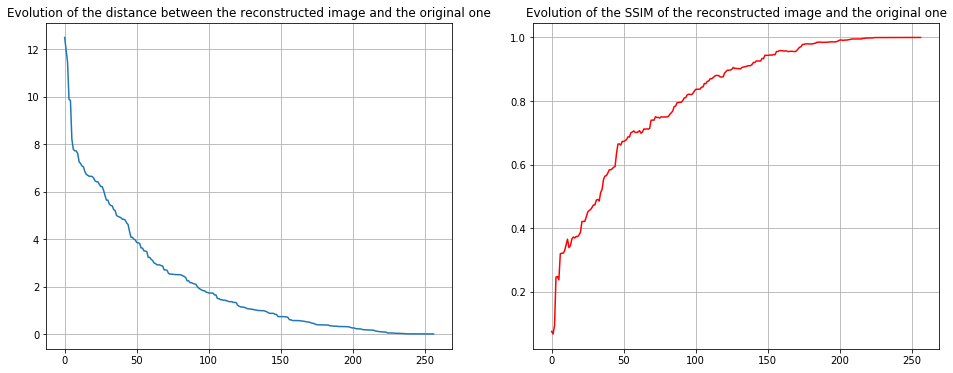

In [189]:
# Digit 5
from skimage.measure import compare_ssim as ssim
n=9
I=train_5[n,:]

d0=la.norm(I-moy_train, 2)

fig = plt.figure(figsize = (16,6))
distances=[d0]
structural_similarities=[ssim(I, moy_train)]
I_0=deepcopy(moy_train)
for i in range(256):
    I_0+=proj[n,i]*comp[i,:]
    distances.append(la.norm(I-I_0,2))
    structural_similarities.append(ssim(I,I_0))
plt.subplot(121)
plt.plot(distances)
plt.title("Evolution of the distance between the reconstructed image and the original one")
plt.grid(True)
plt.subplot(122)
plt.plot(structural_similarities, c="r")
plt.title("Evolution of the SSIM of the reconstructed image and the original one")
plt.grid(True)

To consider the reconstructed image being acceptable or nice we base our qualitative judjument on the value of the distance between the original image and the constructed one and the images we have ploted above. 
To be acceptable, we had the intuition to accept a distance error of **0.2** on each pixel, which implies a global error of **3.2**. A nicer reconstruction we chose is to accept an error of 0.1 on each pixel (global error of **1.6**).

Now for the best reconstruction, we didn't base our choice on the distance but on the **structural similarity index**. With some browsing on the scientific world, we found this paper : https://www.researchgate.net/publication/262897371_Image_Quality_Assessment_Using_the_SSIM_and_the_Just_Noticeable_Difference_Paradigm
It suggests that for a SSIM above 95% people can not notice the image compression. So we used this argument to chose our number of components.

In [167]:
acceptables=[i for i in range(len(distances)) if distances[i]<=3.2] #The value of 3.2 is not completely arbitrary but it means 
                                                                   # that we accep an error of 0.2 for each pixel
print("In our acceptable case the number of components needed is : ",acceptables[0])
print("The corresponding  structural similarity index is: ", structural_similarities[acceptables[0]])

In our acceptable case the number of components needed is :  60
The corresponding  structural similarity index is:  0.7028680986537648


In [169]:
nicers=[i for i in range(len(distances)) if distances[i]<=1.6] #The value of 1.6 is not completely arbitrary but it means 
                                                                   # that we accep an error of 0.1 for each pixel
print("In our nicer case the number of components needed is : ",nicers[0])
print("The corresponding  structural similarity index is: ", structural_similarities[nicers[0]])

In our nicer case the number of components needed is :  106
The corresponding  structural similarity index is:  0.8553755446240375


In [170]:
bests=[i for i in range(len(structural_similarities)) if structural_similarities[i]>=0.95] 
print("In our nicer case the number of components needed is : ",bests[0])
print("The corresponding  structural similarity index is: ", structural_similarities[bests[0]])
print("The corresponding  distance is: ", distances[bests[0]])

In our nicer case the number of components needed is :  156
The corresponding  structural similarity index is:  0.9557399821733542
The corresponding  distance is:  0.5990831559509664


**With 156 components we reconstruct the original image in a way the large majority of people would'nt be able to distinguish it's shape from the original picture. Have a look yourself in the images above, wher we plot the two images :**

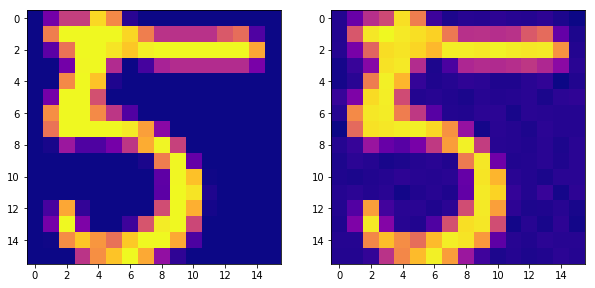

In [182]:
# Digit 5
n=9
I=train_5[n,:]
fig = plt.figure(figsize = (10,5))

plt.subplot(121)
plt.imshow(np.reshape(I,(16,16)),cmap='plasma')

I_0=deepcopy(moy_train)
for i in range(156):
    I_0+=proj[n,i]*comp[i,:]
    
plt.subplot(122)
plt.imshow(np.reshape(I_0,(16,16)),cmap='plasma')

4) <font color="blue">Optional question: do the same for 6.<font>

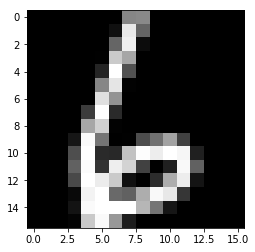

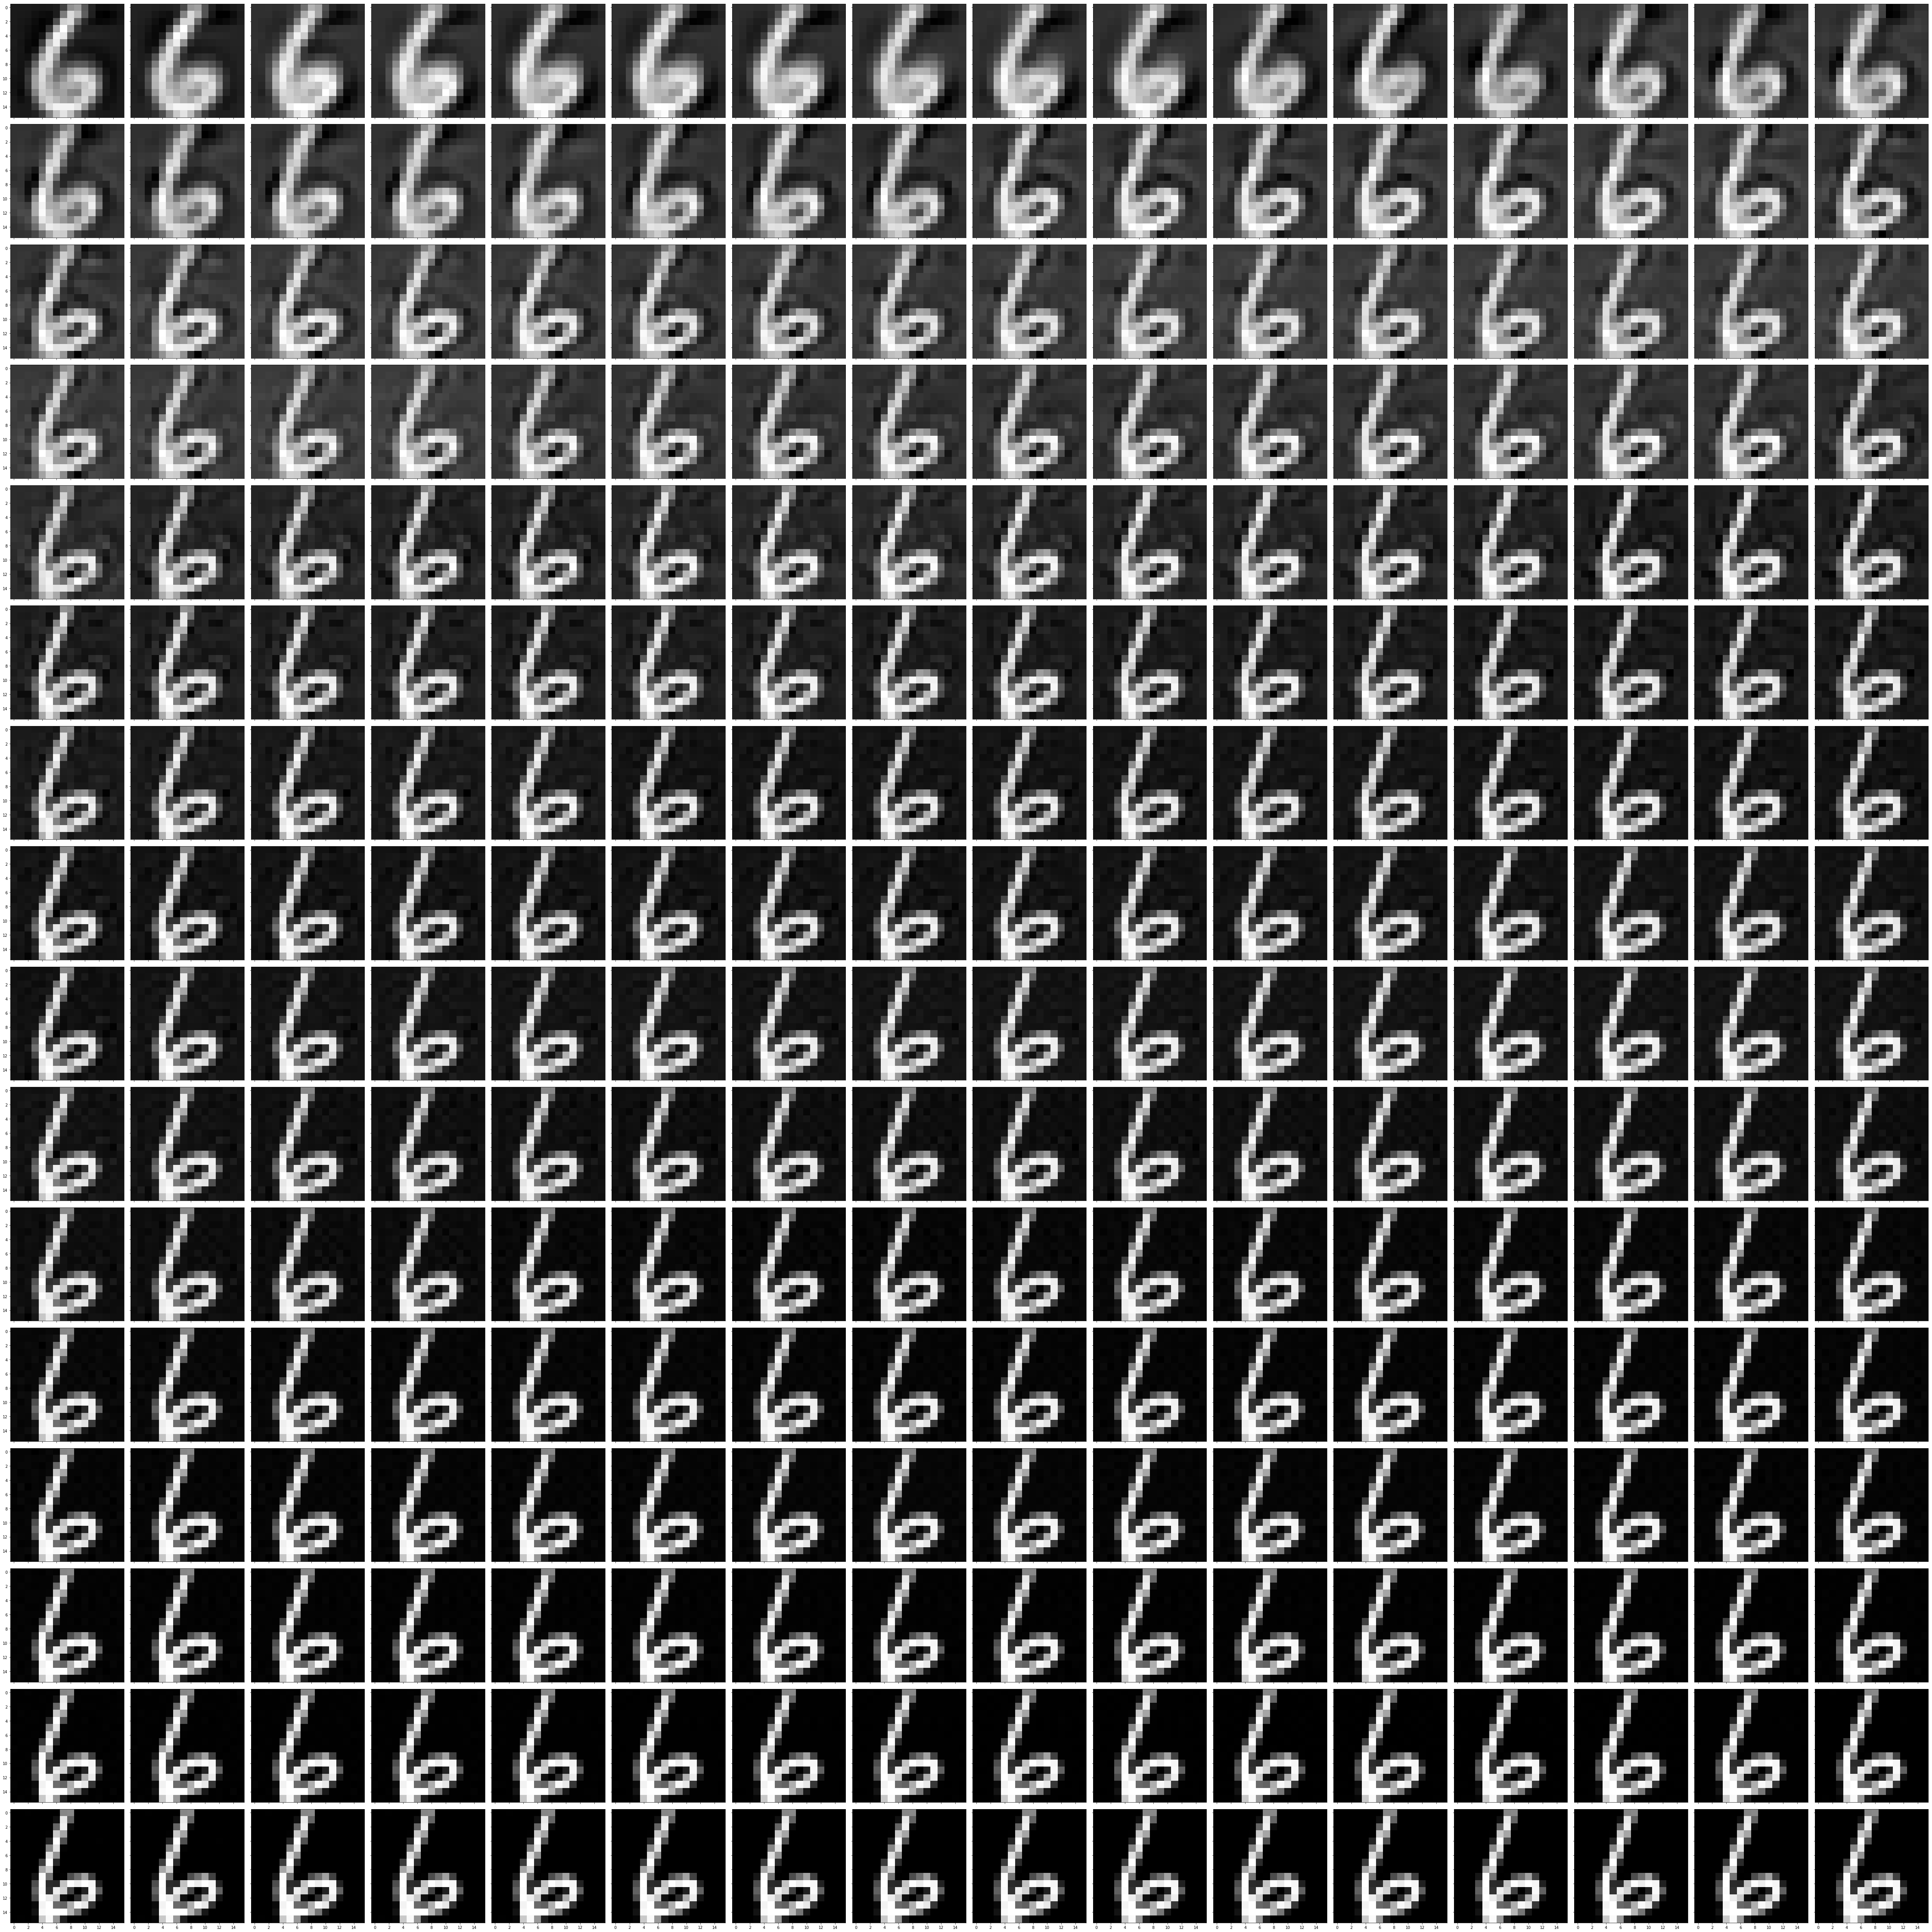

In [149]:
# Digit 6
n=55
digit6=train_6[n,:]

I = np.reshape(digit6,(16,16))
plt.imshow(I,cmap='gray')
plt.show()

I_0 = deepcopy(I_moy) 

fig_6, axes_6 = plt.subplots(nrows=16, ncols=16, figsize=(70,70), sharex=True, sharey=True)
for i, ax in enumerate(axes_6.flatten()):
    I_0 = I_0 + proj[n+145,i]*np.reshape(comp[i,:],(16,16))
    ax.imshow(I_0,cmap='gray')
fig_6.tight_layout()
plt.show()

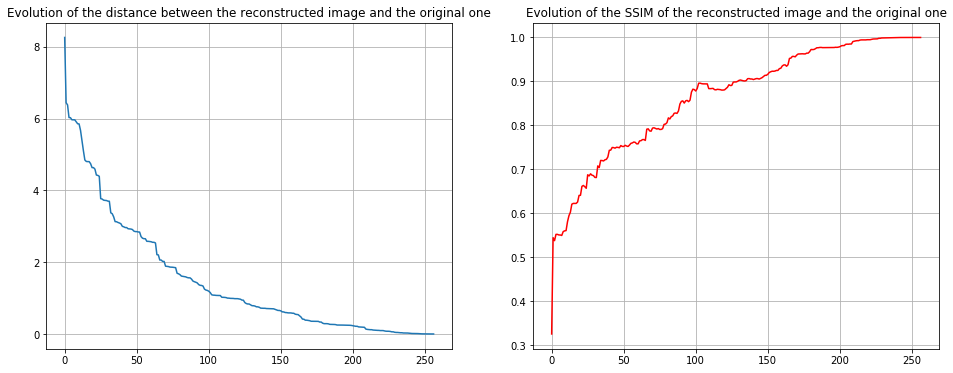

In [177]:
# Digit 6
n=55
I=train_6[n,:]

d0=la.norm(I-moy_train, 2)

fig = plt.figure(figsize = (16,6))
distances=[d0]
structural_similarities=[ssim(I, moy_train)]
I_0=deepcopy(moy_train)
for i in range(256):
    I_0+=proj[n+145,i]*comp[i,:]
    distances.append(la.norm(I-I_0,2))
    structural_similarities.append(ssim(I,I_0))
plt.subplot(121)
plt.plot(distances)
plt.title("Evolution of the distance between the reconstructed image and the original one")
plt.grid(True)
plt.subplot(122)
plt.plot(structural_similarities, c="r")
plt.title("Evolution of the SSIM of the reconstructed image and the original one")
plt.grid(True)

In [180]:
acceptables=[i for i in range(len(distances)) if distances[i]<=3.2] #The value of 3.2 is not completely arbitrary but it means 
                                                                   # that we accep an error of 0.2 for each pixel
print("In our acceptable case the number of components needed is : ",acceptables[0])
print("The corresponding  structural similarity index is: ", structural_similarities[acceptables[0]])

nicers=[i for i in range(len(distances)) if distances[i]<=1.6] #The value of 1.6 is not completely arbitrary but it means 
                                                                   # that we accep an error of 0.1 for each pixel
print("\nIn our nicer case the number of components needed is : ",nicers[0])
print("The corresponding  structural similarity index is: ", structural_similarities[nicers[0]])

bests=[i for i in range(len(structural_similarities)) if structural_similarities[i]>=0.95] 
print("\nIn our best case the number of components needed is : ",bests[0])
print("The corresponding  structural similarity index is: ", structural_similarities[bests[0]])
print("The corresponding  distance is: ", distances[bests[0]])

In our acceptable case the number of components needed is :  35
The corresponding  structural similarity index is:  0.7200827567614754

In our nicer case the number of components needed is :  83
The corresponding  structural similarity index is:  0.8199580921691652

In our best case the number of components needed is :  165
The corresponding  structural similarity index is:  0.9522659123702452
The corresponding  distance is:  0.4143011559906792


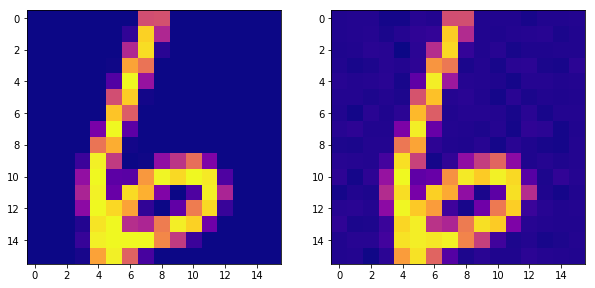

In [184]:
# Digit 6
n=55
I=train_6[n,:]
fig = plt.figure(figsize = (10,5))

plt.subplot(121)
plt.imshow(np.reshape(I,(16,16)),cmap='plasma')

I_0=deepcopy(moy_train)
for i in range(165):
    I_0+=proj[n+145,i]*comp[i,:]
    
plt.subplot(122)
plt.imshow(np.reshape(I_0,(16,16)),cmap='plasma')

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


1) <font color="blue">Use proj[0:2,:] as the coordinates of a point representing each sample of the training set in a plane. Display the cloud of points associated to digits 5 and 6 by using 2 different colors.<font>

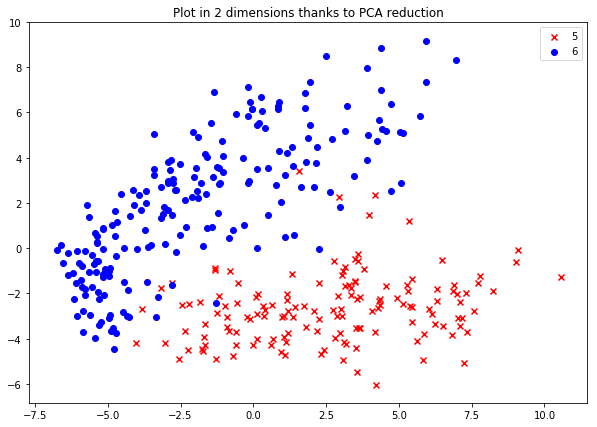

In [285]:
# Exercise 2
plt.figure(figsize=(10,7))
plt.scatter(proj[:145,0], proj[:145,1], color='r', label='5', marker='x')
plt.scatter(proj[145:,0], proj[145:,1], color='b', label='6')
plt.title("Plot in 2 dimensions thanks to PCA reduction")
plt.legend()
plt.show()

2) <font color="blue">Comment on the repartition of points in the plane.<font>

With a reduction at 2 dimension, we can see that digits 5 and 6 can visually seperate 2 areas according to the value of the digit.

3) <font color="blue">Do you see how this PCA step makes possible the use of a much simpler classification? What would you propose as an alternative to logistic regression of TP3 then?<font>

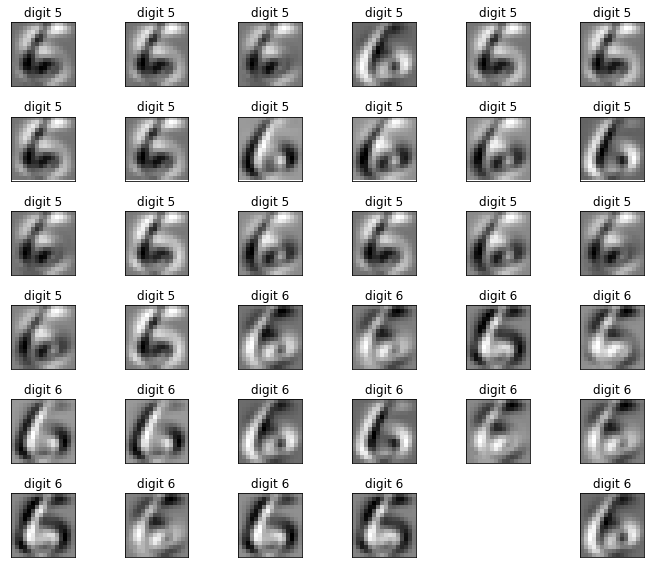

In [186]:
# Digits 5 and 6

fig = plt.figure(figsize=(10,8))

for idx, i in enumerate(range(125, 161)):
    I = proj[i,0]*np.reshape(comp[0,:],(16,16)) + proj[i,1]*np.reshape(comp[1,:],(16,16))
    plt.subplot(6,6,idx+1)
    if i < 145 :
        plt.title("digit 5")
    else :
        plt.title("digit 6")
    plt.imshow(I, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.tight_layout()
plt.show()

- We cannot recognize digits 5 and 6 but we can see that 2 differents "shape" are seperatable : some black areas for 5s are white for 6s. That's why PCA decomposition in 2 dimensions allows us to seperate 2 areas for 5s and 6s in the plot below. <br>
<br>
- A LDA algorithm could be used to separate the 2 areas because they are seperatable in this space. Moreover, a QDA in a 2-dimension may be also computed where digits coordinates would be their projections on the 2 eigenvectors.

**Now that our data is clearly separable, we perform an LDA, QDA and the logistic regression model we used in TP3 with the Newton-Raphson optimization method**. 

In [271]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [288]:
d = 2 #Number of dimensions to use for the classification
x_train = proj[:,:d]
x_test = projTest[:,:d]

X_train = np.hstack((np.ones((N_train,1)),x_train))
T_train = np.column_stack(class_train)[0]

X_test=np.hstack((np.ones((N_test,1)),x_test))
Test_classif_rests=f(X_test,w=w)
T_test = np.hstack((np.zeros((411,)), np.ones((464,))))

In [289]:
lda = LinearDiscriminantAnalysis(solver='svd')
sklearn_LDA_output_on_train = lda.fit(x_train, T_train)
print("[LDA] The misclassification error on the training set is : "+str(100*(1-sklearn_LDA_output_on_train.score(x_train, T_train)))+' %')
print("[LDA] The misclassification error on the test set is : "+str(100*(1-sklearn_LDA_output_on_train.score(x_test, T_test)))+' %')

qda = QuadraticDiscriminantAnalysis()
sklearn_QDA_output_on_train = qda.fit(x_train, T_train)
print("\n[QDA] The misclassification error on the training set is : "+str(100*(1-sklearn_QDA_output_on_train.score(x_train, T_train)))+' %')
print("[QDA] The misclassification error on the test set is : "+str(100*(1-sklearn_QDA_output_on_train.score(x_test, T_test)))+' %')

[LDA] The misclassification error on the training set is : 4.347826086956519 %
[LDA] The misclassification error on the test set is : 5.028571428571427 %

[QDA] The misclassification error on the training set is : 3.1884057971014457 %
[QDA] The misclassification error on the test set is : 4.342857142857149 %


In [302]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # Initializing the reweighting matrix R
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
    # boucle appliquant l'algortihme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ):# stop condition on both Number of iteration 
                                                                  # and  the relative distance between w and w_old
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w))) #Applying the sigmoid function 
        R = np.diag(y*(1-y)) # The reweighting matrix R
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z) #compute the new w for the new iteration of Newton-Raphson
    return w, Niter

# Given a test set (arra like) and the computed weights,
# outputs the class of each data point 
def f(X, w=w):
    output=np.empty(0)
    for i in range(X.shape[0]):
        if 1/(1+np.exp(-X[i].dot(w)))>=0.5:
            output=np.append(output, 1)
        else: 
            output=np.append(output, 0)
    return output

# given two array like inputs of the same shape, 
# outputs the classification error (frenquency of misclassified data points)
def error(t_pred, t_test):
    pred_lenght=len(t_pred)
    error_indexes=[i for i in range(pred_lenght) if t_pred[i]!=t_test[i]]
    return 100*(len(error_indexes)/pred_lenght)

w, Niter = regression_logistique(X_train,T_train,Nitermax=13,eps_conv=1e-2)
print("- Test classification error is:  {error} %".format(error=error(Test_classif_rests, T_test)))
Train_classif_rests=f(X_train,w=w)
print("- Training classification error is:  {error} %".format(error=error(Train_classif_rests, T_train)))

- Test classification error is:  46.62857142857143 %
- Training classification error is:  3.768115942028986 %


We clearly see that the different models perform well on the test set. What we instatantely pay attention to is the performance of the logistic regression algorithm based on **Newton-Raphson optimization method** which now have a better generalization error when trained on the 2 main principal components only. 

#### - <font color="blue">Let's now see how the use of more dimensions affects the classification performances of the three algorithms :<font>

The least test error for LDA is 3.200000000000003 which occurs for a combination of 21 components.
The least test error for QDA is 1.0285714285714231 which occurs for a combination of 22 components.
The least test error for logistic regression (Newton-Raphson based) is 2.9714285714285715 which occurs for a combination of 16 components.


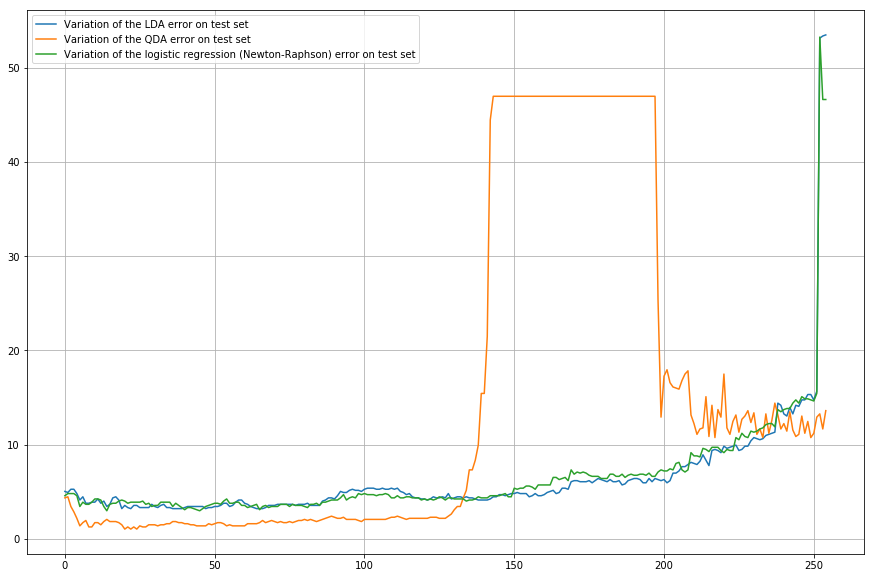

In [318]:
lda_errors, qda_errors, reg_log_errors=[], [], []
for d in range(2,257) :
    x_train = proj[:,:d]
    x_test = projTest[:,:d]
    
    X_train = np.hstack((np.ones((N_train,1)),x_train))
    T_train = np.column_stack(class_train)[0]
    X_test=np.hstack((np.ones((N_test,1)),x_test))
    T_test = np.hstack((np.zeros((411,)), np.ones((464,))))
    
    lda = LinearDiscriminantAnalysis(solver='svd')
    sklearn_LDA_output_on_train = lda.fit(x_train, T_train)
    lda_errors.append(100*(1-sklearn_LDA_output_on_train.score(x_test, T_test)))
    
    qda = QuadraticDiscriminantAnalysis()
    sklearn_QDA_output_on_train = qda.fit(x_train, T_train)
    qda_errors.append(100*(1-sklearn_QDA_output_on_train.score(x_test, T_test)))
    
    w, Niter = regression_logistique(X_train,T_train,Nitermax=4,eps_conv=1e-2)
    Test_classif_rests=f(X_test,w=w)
    reg_log_errors.append(error(Test_classif_rests, T_test))

comp_lda=[i+2 for i in range(len(lda_errors)) if lda_errors[i]==min(lda_errors)][0]
comp_qda=[i+2 for i in range(len(qda_errors)) if qda_errors[i]==min(qda_errors)][0]
comp_reg=[i+2 for i in range(len(reg_log_errors)) if reg_log_errors[i]==min(reg_log_errors)][0]

print("The least test error for LDA is {min_lda} which occurs for a combination of {nbr_lda} components.".format(min_lda=min(lda_errors), nbr_lda=comp_lda))
print("The least test error for QDA is {min_qda} which occurs for a combination of {nbr_qda} components.".format(min_qda=min(qda_errors), nbr_qda=comp_qda))
print("The least test error for logistic regression (Newton-Raphson based) is {min_reg} which occurs for a combination of {nbr_reg} components.".format(min_reg=min(reg_log_errors), nbr_reg=comp_reg))

plt.figure(figsize=(15,10))
plt.plot(lda_errors, label="Variation of the LDA error on test set")
plt.plot(qda_errors, label="Variation of the QDA error on test set")
plt.plot(reg_log_errors, label="Variation of the logistic regression (Newton-Raphson) error on test set")
plt.grid(True)
plt.legend()

We clearly see all the algorithms have their best performance on test set under 22 combinations of the PCA components. Those best cases reduce a lot the generalization error in the case of each algorithm, especially for the QDA. We can also notice that for the logistic regression the minimum error is comparable to the results we had when we used the logistic regression of **Sickit-learn**. 

We should point that QDA has the best performance among the algorithms for a combination of components under (approximately) 140. It's error raises after that dramatically, which we may explain by the overfitting of the model. In the other side, logistic regression and LDA keep quit the same track. This last note can mean that their is no outliers in the whole training sets, because otherwise the LDA and the logistic regression would tend to have a large gap in the test error.

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    